In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Identify numerical variables
# numerical_cols = df.select_dtypes(include=['int64']).columns

# # Create a box plot for each numerical variable
# for col in numerical_cols:
#     plt.figure(figsize=(4, 2))
#     sns.boxplot(x=df[col])
#     plt.title(f'Box Plot of {col}')
#     plt.show()

In [7]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [8]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

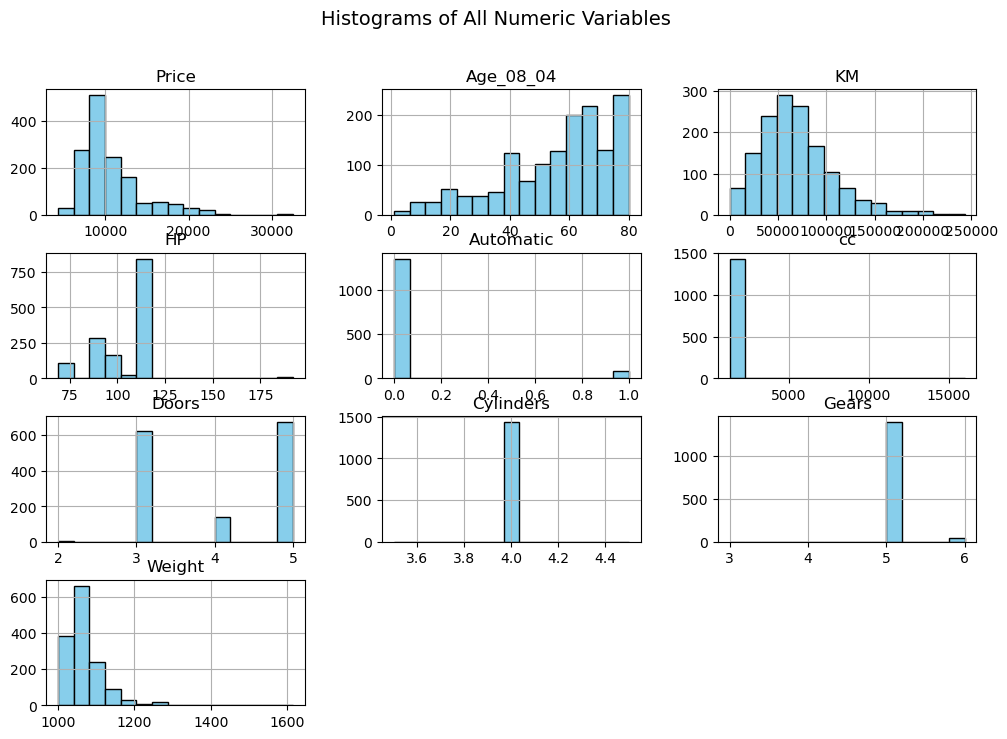

In [9]:
# 1. Histogram for all numeric variables

df.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numeric Variables", fontsize=14)
plt.show()

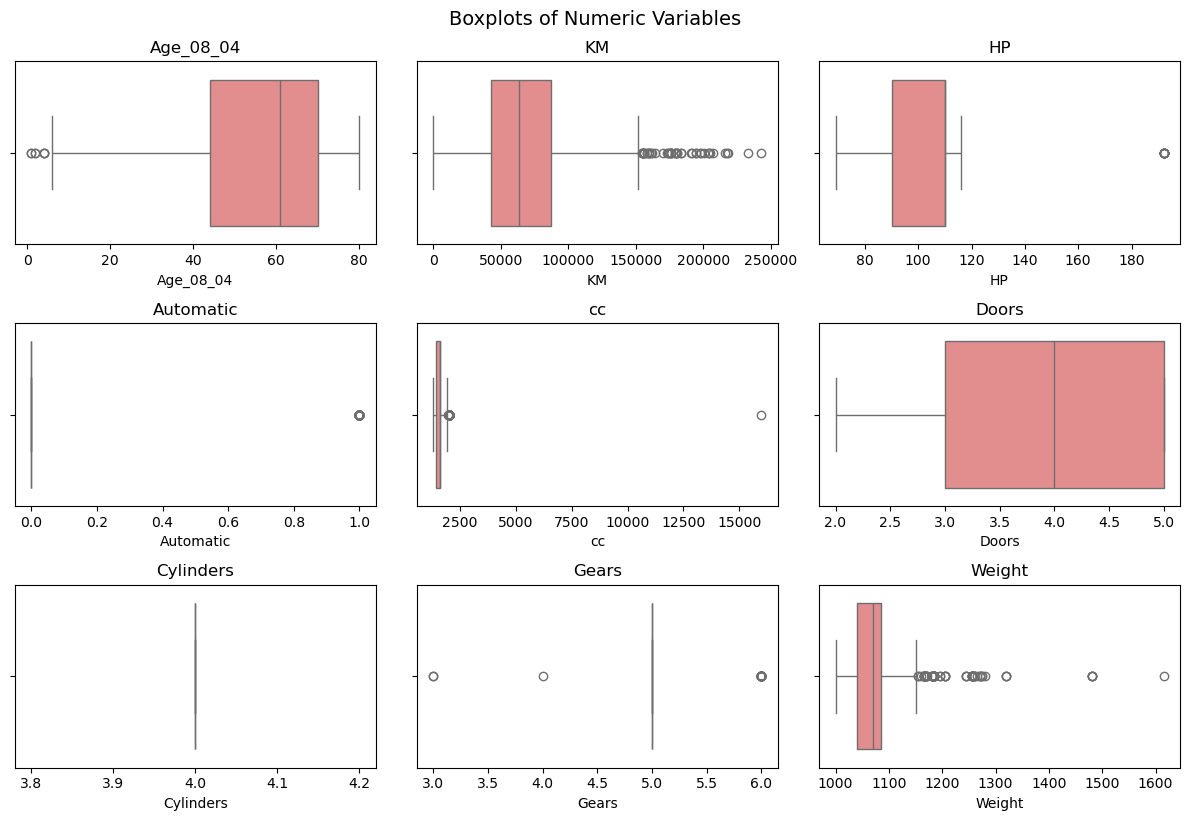

In [10]:
# 2. Boxplots for numerical variables (to detect outliers)

numeric_cols = ["Age_08_04", "KM", "HP","Automatic", "cc", "Doors", "Cylinders", "Gears", "Weight"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Variables", y=1.02, fontsize=14)
plt.show()

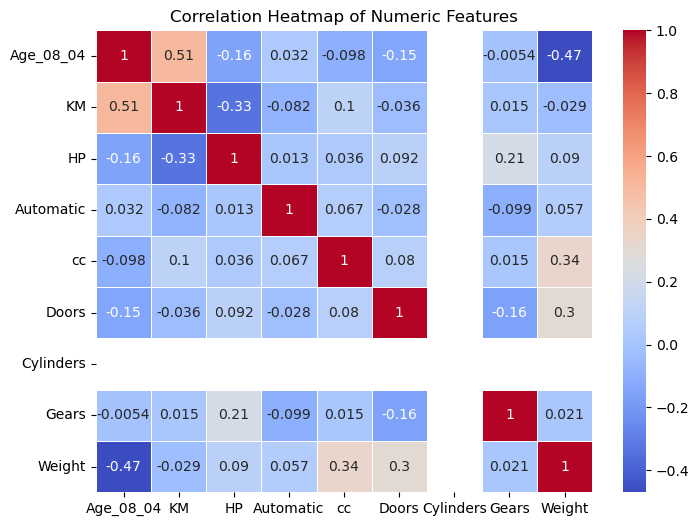

In [11]:
# 4. Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [12]:
# sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
# plt.suptitle("Pairplot of Numeric Variables", y=1.02, fontsize=14)
# plt.show()

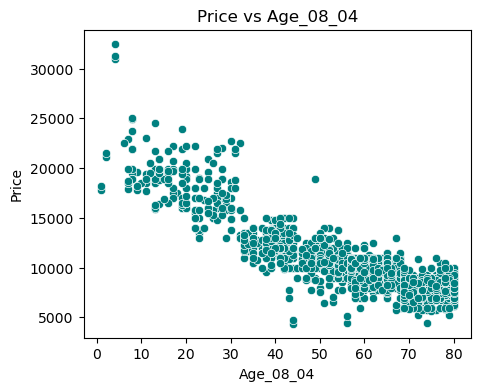

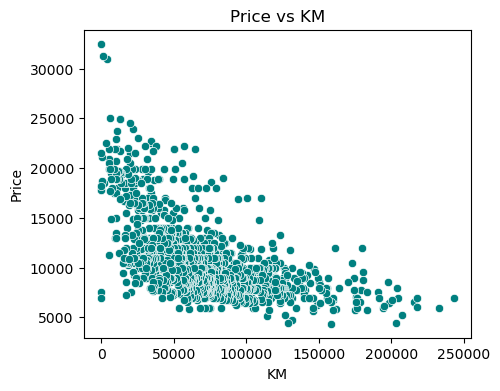

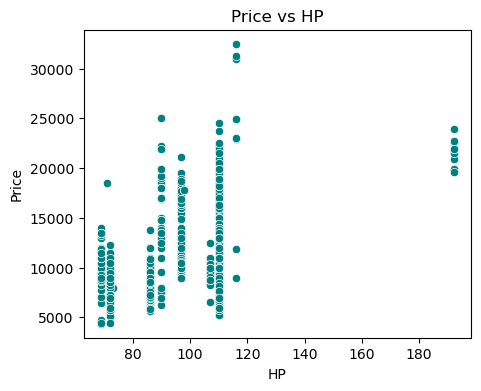

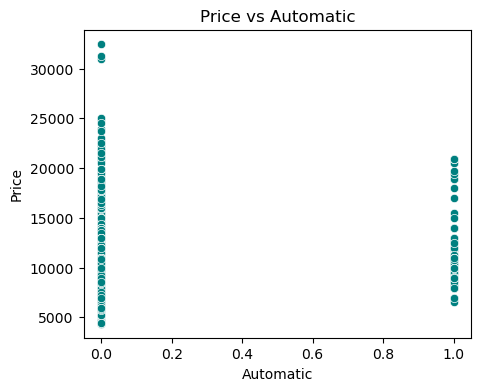

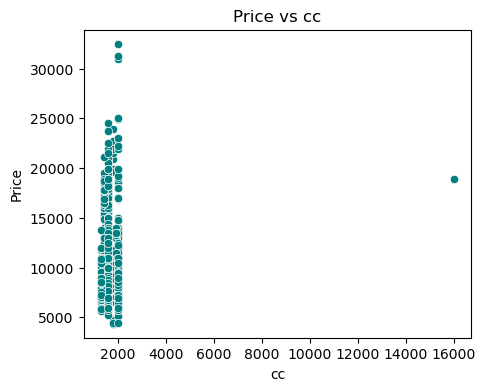

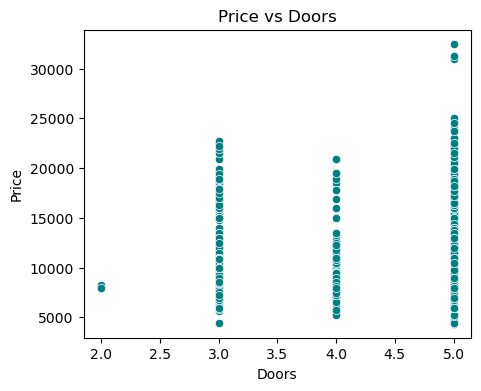

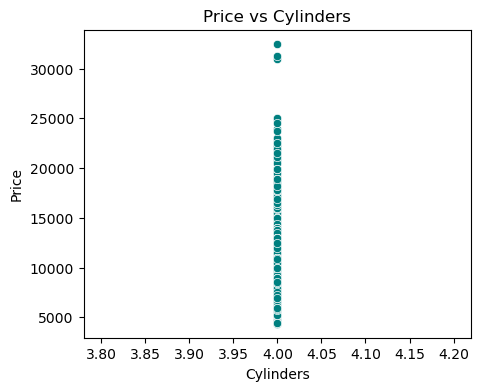

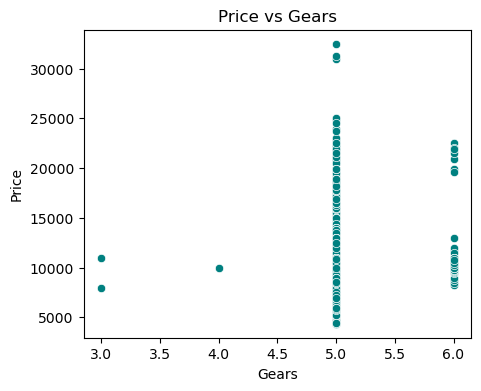

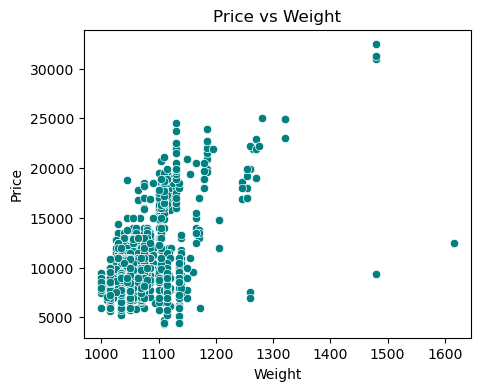

In [13]:
for col in numeric_cols:
    if col != "Price":
        plt.figure(figsize=(5,4))
        sns.scatterplot(x=df[col], y=df["Price"], color='teal')
        plt.title(f"Price vs {col}")
        plt.show()

In [48]:
# Step 2: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Assuming X contains features and Y contains the target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display dataset sizes
print("Training set size :", X_train.shape[0])
print("Testing set size  :", X_test.shape[0])


Training set size : 1148
Testing set size  : 288


In [49]:
# 3.Build a multiple linear regression model using the training dataset. 
# Interpret the coefficients of the model. Build a minimum of 3 different models.

from sklearn.linear_model import LinearRegression
import pandas as pd

#MODEL-01
model1 = LinearRegression()
model1.fit(X_train, Y_train)

print("Model 1 - All Features")
print("Intercept:", model1.intercept_)
print("Coefficients:\n", pd.Series(model1.coef_, index=X_train.columns))
print()

Model 1 - All Features
Intercept: -8216.3852800165
Coefficients:
 Age_08_04   -1.207831e+02
KM          -1.998627e-02
HP           2.742911e+01
Automatic    3.712087e+02
cc          -1.135136e-01
Doors        7.535468e+00
Cylinders    2.216893e-12
Gears        6.264184e+02
Weight       1.984314e+01
dtype: float64



In [50]:
# ---------- Model 2: Add an interaction feature ----------
X_train2 = X_train.copy()
X_train2["Age_KM"] = X_train["Age_08_04"] * X_train["KM"]

model2 = LinearRegression()
model2.fit(X_train2, Y_train)

print("Model 2 - With Interaction Feature (Age * KM)")
print("Intercept:", model2.intercept_)
print("Coefficients:\n", pd.Series(model2.coef_, index=X_train2.columns))
print()


Model 2 - With Interaction Feature (Age * KM)
Intercept: -5354.761522316048
Coefficients:
 Age_08_04   -1.518139e+02
KM          -5.660056e-02
HP           2.640462e+01
Automatic    3.968204e+02
cc          -9.971438e-02
Doors       -1.636008e+00
Cylinders   -4.547474e-13
Gears        6.832294e+02
Weight       1.855906e+01
Age_KM       6.192973e-04
dtype: float64



In [51]:
# ---------- Model 3: Select only important features ----------
selected_features = ["Age_08_04", "HP", "Weight"]
model3 = LinearRegression()
model3.fit(X_train[selected_features], Y_train)

print("Model 3 - Selected Features Only")
print("Intercept:", model3.intercept_)
print("Coefficients:\n", pd.Series(model3.coef_, index=selected_features))


Model 3 - Selected Features Only
Intercept: -2051.9626654308886
Coefficients:
 Age_08_04   -144.453567
HP            42.732677
Weight        15.418102
dtype: float64


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---------- Model 1 ----------
y_pred1 = model1.predict(X_test)

print("Model 1 Performance:")
print("R² Score :", r2_score(Y_test, y_pred1))
print("MAE      :", mean_absolute_error(Y_test, y_pred1))
print("MSE      :", mean_squared_error(Y_test, y_pred1))
print("RMSE     :", np.sqrt(mean_squared_error(Y_test, y_pred1)))
print()


Model 1 Performance:
R² Score : 0.8523452141908858
MAE      : 997.0024057258057
MSE      : 1970126.628813023
RMSE     : 1403.611993683804



In [56]:
# ---------- Model 2 ----------
X_test2 = X_test.copy()
X_test2["Age_KM"] = X_test["Age_08_04"] * X_test["KM"]

y_pred2 = model2.predict(X_test2)

print("Model 2 Performance (With Interaction Term):")
print("R² Score :", r2_score(Y_test, y_pred2))
print("MAE      :", mean_absolute_error(Y_test, y_pred2))
print("MSE      :", mean_squared_error(Y_test, y_pred2))
print("RMSE     :", np.sqrt(mean_squared_error(Y_test, y_pred2)))
print()


Model 2 Performance (With Interaction Term):
R² Score : 0.8737240126775344
MAE      : 935.7930788924111
MSE      : 1684873.83487362
RMSE     : 1298.026900674104



In [57]:
# ---------- Model 3 ----------
y_pred3 = model3.predict(X_test[["Age_08_04", "HP", "Weight"]])

print("Model 3 Performance (Selected Features):")
print("R² Score :", r2_score(Y_test, y_pred3))
print("MAE      :", mean_absolute_error(Y_test, y_pred3))
print("MSE      :", mean_squared_error(Y_test, y_pred3))
print("RMSE     :", np.sqrt(mean_squared_error(Y_test, y_pred3)))


Model 3 Performance (Selected Features):
R² Score : 0.8315557548230362
MAE      : 1093.2552092820197
MSE      : 2247515.9953329586
RMSE     : 1499.1717697892254


In [58]:
from sklearn.model_selection import ShuffleSplit,cross_validate
# cross_val_score
shuffle_split = ShuffleSplit(n_splits=500, test_size=0.2, random_state=42)
cv_scores = cross_validate(lr, X_scale, Y, cv=shuffle_split, scoring='r2',return_train_score=True)

# Extract train and test scores
train_scores = cv_scores['train_score']
test_scores = cv_scores['test_score']

# Show individual scores and their means
print("cross validation: training score:" , np.round(train_scores.mean(),2))
print("cross validation: test score:" , np.round(test_scores.mean(),2))

cross validation: training score: 0.86
cross validation: test score: 0.83


In [60]:
# Step 8: Apply LassoCV to find the best alpha
from sklearn.linear_model import LassoCV
from sklearn.model_selection import ShuffleSplit
import numpy as np

shuffle_split_lassocv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

lassocv_model = LassoCV(cv=shuffle_split_lassocv, random_state=42)

lassocv_model.fit(X_scale, Y)

best_alpha_lassocv = lassocv_model.alpha_
mse_path = lassocv_model.mse_path_
mean_mse = mse_path.mean(axis=1)
best_mse = mean_mse[lassocv_model.alphas_ == best_alpha_lassocv][0]

print("\nLasso Results:")
print("Best alpha found:", best_alpha_lassocv)
# You can also access the mean squared error for the best alpha
print("Mean squared error for best alpha:", best_mse)


Lasso Results:
Best alpha found: 63.858557917176825
Mean squared error for best alpha: 1844891.8429234994


In [61]:
# Step 11: Fit Lasso model with best alpha and count zero/non-zero coefficients
from sklearn.linear_model import Lasso

final_lasso_model = Lasso(alpha=best_alpha_lassocv)
final_lasso_model.fit(X_scale, Y) # Fit on the entire dataset for coefficient analysis

lasso_coefficients = final_lasso_model.coef_

zero_coefficients = np.sum(lasso_coefficients == 0)
non_zero_coefficients = np.sum(lasso_coefficients != 0)

print("\nAnalysis of Lasso Coefficients (with best alpha):")
print("Number of zero coefficients:", zero_coefficients)
print("Number of non-zero coefficients:", non_zero_coefficients)


Analysis of Lasso Coefficients (with best alpha):
Number of zero coefficients: 3
Number of non-zero coefficients: 6


In [63]:
# Step 8: Apply RidgeCV to find the best alpha
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
import numpy as np

# Define the ShuffleSplit cross-validation strategy
shuffle_split_ridgecv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# Define the RidgeCV model
# RidgeCV can automatically select the best alpha using cross-validation
ridgecv_model = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=shuffle_split_ridgecv, scoring='neg_mean_squared_error')

# Fit the model
ridgecv_model.fit(X_scale, Y)

# Get the best alpha
best_alpha_ridgecv = ridgecv_model.alpha_

print("\nRidgeCV Results:")
print("Best alpha found:", best_alpha_ridgecv)



RidgeCV Results:
Best alpha found: 107.22672220103232


In [20]:
# Step 5: Apply Lasso Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lasso = Lasso(alpha=0.1)   
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso Regression: ")
print("MAE:", round(mean_absolute_error(y_test, lasso_pred), 2))
print("MSE:", round(mean_squared_error(y_test, lasso_pred), 2))
print("R²:", round(r2_score(y_test, lasso_pred), 3))

Lasso Regression: 
MAE: 996.98
MSE: 1970167.55
R²: 0.852


In [21]:
# Step 5: Apply Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge Regression Performance")
print("MAE:", round(mean_absolute_error(y_test, ridge_pred), 2))
print("MSE:", round(mean_squared_error(y_test, ridge_pred), 2))
print("R²:", round(r2_score(y_test, ridge_pred), 3))

Ridge Regression Performance
MAE: 996.94
MSE: 1970379.65
R²: 0.852


In [ ]:
# Interview Questions:

# 1.What is Normalization & Standardization and how is it helpful? 
#      Normalization:
#      1.Normalization is a data preprocessing technique used to rescale numerical features to a fixed range, usually 0 to 1, so that all features are on the same scale.
#         Formula: X_new = (X - X_min)/(X_max - X_min)
#         Since normalization depends on min and max, any extreme value can significantly affect the scaling.
#      2. Sensitive to outliers: If the dataset has extreme values, normalized values may get compressed.
#      3. Improves performance of distance-based algorithms: Algorithms like KNN and K-Means rely on distance calculations, so normalization improves their accuracy.
#     Standardization:
#     1. Transforms data to have mean = 0 and standard deviation = 1
#     Formula: X_new = (X - mean)/Std
#     Standardization can be helpful in cases where the data follows a Gaussian distribution.
#     2. Assumes data is approximately normally distributed.
#     3. Less affected by outliers compared to normalization


# 2.What techniques can be used to address multicollinearity in multiple linear regression?
# 1. Remove Highly Correlated Variables
# . Use a correlation matrix to identify strongly correlated predictors
# . Remove one variable from each correlated pair to reduce redundancy

# 2. Variance Inflation Factor (VIF)
# . Measures how much a predictor is affected by multicollinearity
# . VIF > 10 indicates serious multicollinearity
# . Remove or modify variables with high VIF

# 3. Feature Selection Methods
# . Forward selection, backward elimination, and stepwise regression
# . Keeps only statistically significant predictors

# 4. Regularization Techniques
# . Ridge Regression (L2): Shrinks coefficients to reduce variance
# . Lasso Regression (L1): Eliminates less important features

# 5. Principal Component Analysis (PCA)
# . Converts correlated variables into uncorrelated components
# . Reduces dimensionality but lowers interpretability